In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
sns.set_style("ticks")

In [2]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/OHIO samples-2.zip').open(name='result.csv'))


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
stations = pd.read_csv('../../measurements/USGS stream data/OHIO station info.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
river='Black_OH_R'

In [5]:
location = (41.380678, -82.079920)

In [6]:
delta_xy = 0.5
r_stations = stations[(stations.LatitudeMeasure>location[0]-delta_xy) & (stations.LatitudeMeasure<location[0]+delta_xy) &
                     (stations.LongitudeMeasure>location[1]-delta_xy) & (stations.LongitudeMeasure<location[1]+delta_xy)]

In [7]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
# csv_file_df['']
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df
df = csv_file_df[(csv_file_df['CharacteristicName']=="Chloride")  & (csv_file_df['ActivityStartDate'].dt.year>1995)]
df.shape              

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(3250, 63)

In [8]:
Show_IDS = [[st, False] for st in df.MonitoringLocationIdentifier.unique()] 

In [55]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=12.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
#     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     if N>0:
#         st_df = stations[stations.MonitoringLocationIdentifier == st]
#         folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                                 st_df.LongitudeMeasure.values[0]], 
#                                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0] + '\n' + 'N:{}'.format(N),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                      ).add_to(m)



Show_IDS = [
["21OHIO_WQX-B01K29", False],
["21OHIO_WQX-B01K32", False],
["21OHIO_WQX-B01S22", False],
["21OHIO_WQX-B01K51", False],
["21OHIO_WQX-B01S15", False],
["21OHIO_WQX-B01S14", False],
["21OHIO_WQX-B01S06", False],
["21OHIO_WQX-B01K53", False],
["21OHIO_WQX-501510", True],
["21OHIO_WQX-B01E01", False],
["21OHIO_WQX-B01W07", False],
["21OHIO_WQX-B01S09", False],
["USGS-04200500", True],
]

ignore_indx = [9,10]

for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    coef_r = 3
    a,b = random.randrange(-100, 100, 1)*1e-5*coef_r, random.randrange(-100, 100, 1)*1e-5*coef_r
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0]+a, 
                            st_df.LongitudeMeasure.values[0]+b], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index in [i-1 for i in ignore_indx]:
        folium.map.Marker(
#         location=[st_df.LatitudeMeasure.values[0]+0.0235+a,st_df.LongitudeMeasure.values[0]-0.1026+b], # 10 km
#         location=[st_df.LatitudeMeasure.values[0]+0.0135+a,st_df.LongitudeMeasure.values[0]-0.0526+b], # 5km
        location=[st_df.LatitudeMeasure.values[0]+0.0065+a,st_df.LongitudeMeasure.values[0]-0.026+b], # 2km
#         location=[st_df.LatitudeMeasure.values[0]+0.0031+a,st_df.LongitudeMeasure.values[0]-0.013+b], # 1km
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)


m






21OHIO_WQX-B01K29
21OHIO_WQX-B01K32
21OHIO_WQX-B01S22
21OHIO_WQX-B01K51
21OHIO_WQX-B01S15
21OHIO_WQX-B01S14
21OHIO_WQX-B01S06
21OHIO_WQX-B01K53
21OHIO_WQX-501510
21OHIO_WQX-B01E01
21OHIO_WQX-B01W07
21OHIO_WQX-B01S09
USGS-04200500


In [10]:
selected_stations = [s[0] for s in Show_IDS]
# selected_stations[-1] = 'HTLP (NCWQR)'
# selected_stations = [
#     ["21OHIO_WQX-U04Q01", False],
#     ["21OHIO_WQX-U04S17", False],
#     ["21OHIO_WQX-U04S18", False],
#     ["21OHIO_WQX-500890", False],
#     ["21OHIO_WQX-U04E01", False],
#     ["21OHIO_WQX-U04W11", False],
#     ["21OHIO_WQX-U04S23", False],
#     ["21OHIO_WQX-U04T02", False],
#     ["21OHIO_WQX-300830", True],    
#     ["USGS-04198000", True],
# ]

In [11]:
# selected_stations = selected_stations[:-1] + ['HTLP (NCWQR)']

In [12]:
WQP_name = "Chloride"


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ActivityStartDate'].dt.year>1995) & (csv_file_df['ActivityStartDate'].dt.year<2019)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(245, 63)

In [13]:
# df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/Cl_Vermilion_River_Data.csv')

# df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
# df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
# df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
# df_heideleberg['ResultMeasureValue']=df_heideleberg['Chloride, mg/L']
# df_heideleberg['ResultMeasureValue'] = df_heideleberg['ResultMeasureValue']*(df_heideleberg['ResultMeasureValue']<500)
# df_heideleberg['ResultMeasureValue'] = pd.to_numeric(df_heideleberg['ResultMeasureValue'])
# df_heideleberg['ActivityStartDate'] = pd.to_datetime(df_heideleberg['ActivityStartDate'])
# sp= sp.append(df_heideleberg) 
# sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
# sp['Station']=sp['MonitoringLocationIdentifier']
# sp.shape


In [14]:
pt = sns.color_palette("colorblind", len(selected_stations))

In [15]:
len(selected_stations)

13

In [16]:
sp['ResultMeasure/MeasureUnitCode'].unique()

array(['mg/l'], dtype=object)

In [17]:
# sp.loc[sp["ResultMeasureValue"]>100, "ResultMeasureValue"] = np.nan

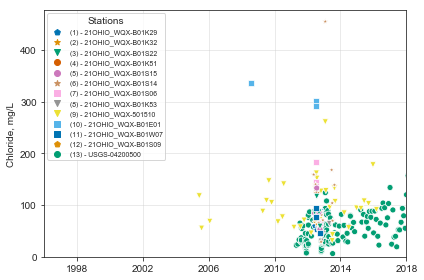

In [21]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=selected_stations, hue='MonitoringLocationIdentifier', palette=pt, style='MonitoringLocationIdentifier', markers=["o", "v", "s", "p", "*", "o", "v", "s", "p", "*", "o", "v", "s", "p", "*"])
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('Rivers/'+river+'/'+river+'_Cl.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_meas.pdf')



In [22]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(selected_stations).round(1).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &   min &    25\% &    50\% &    75\% &    max \\
MonitoringLocationIdentifier &        &        &        &       &        &        &        &        \\
\midrule
21OHIO\_WQX-B01K29            &    4.0 &   58.2 &    7.7 &  51.8 &   52.4 &   56.2 &   62.0 &   68.4 \\
21OHIO\_WQX-B01K32            &    4.0 &   65.1 &    6.7 &  57.2 &   61.3 &   65.1 &   68.9 &   73.0 \\
21OHIO\_WQX-B01S22            &    4.0 &   87.4 &   23.6 &  59.2 &   79.7 &   86.6 &   94.3 &  117.0 \\
21OHIO\_WQX-B01K51            &    3.0 &   89.2 &   36.2 &  53.6 &   70.8 &   88.0 &  107.0 &  126.0 \\
21OHIO\_WQX-B01S15            &    4.0 &   89.2 &   33.0 &  52.8 &   76.8 &   85.4 &   97.8 &  133.0 \\
21OHIO\_WQX-B01S14            &   16.0 &  128.0 &   95.3 &  29.0 &   78.6 &  114.5 &  139.2 &  455.0 \\
21OHIO\_WQX-B01S06            &    3.0 &  130.9 &   60.5 &  64.6 &  104.8 &  145.0 &  164.0 &  183.0 \\
21OHIO\_WQX-B01K53            &    4.0 &   4

In [23]:
selected_stations

['21OHIO_WQX-B01K29',
 '21OHIO_WQX-B01K32',
 '21OHIO_WQX-B01S22',
 '21OHIO_WQX-B01K51',
 '21OHIO_WQX-B01S15',
 '21OHIO_WQX-B01S14',
 '21OHIO_WQX-B01S06',
 '21OHIO_WQX-B01K53',
 '21OHIO_WQX-501510',
 '21OHIO_WQX-B01E01',
 '21OHIO_WQX-B01W07',
 '21OHIO_WQX-B01S09',
 'USGS-04200500']

In [25]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = ['HTLP (NCWQR)']
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(192, 63)

In [57]:
master_st_df.groupby('ActivityStartDate').mean().shape

(167, 6)

In [56]:
master_st_df[[
    'ActivityStartDate','USGSPCode', 'ResultMeasureValue']][master_st_df.ActivityStartDate>datetime.datetime(1995,12,31)].groupby('ActivityStartDate').mean().reset_index().sort_values('ActivityStartDate').to_csv(
    'Rivers/'+river+'/Cl_'+river+'iver_data.csv', index=False)



### Discharge

In [58]:
# Finde station here:
# https://www.hydrocloud.org
site = '04200500'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [59]:
discharge.columns

Index(['USGS:04200500:00060:00003', 'USGS:04200500:00060:00003_qualifiers'], dtype='object')

In [60]:
discharge['Flow, CFS']=discharge['USGS:'+site+':00060:00003']

In [61]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-'+site

In [62]:
discharge[discharge.Source=='USGS-'+site][['Date', 'Flow, CFS']].dropna().to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [63]:
# discharge = discharge.append(df_Q_heideleberg)

In [64]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

In [65]:
site = 'USGS-'+site

In [66]:
river

'Black_OH_R'

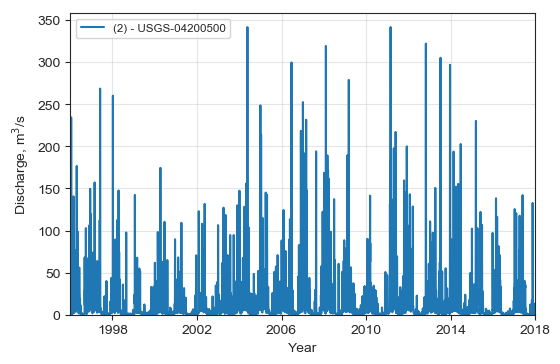

In [67]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


# ax.legend(['({}) - {}'.format(selected_stations.index(site)+1, site)], loc=2, fontsize='small')
ax.legend(['(2) - '+site], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('Rivers/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Q.pdf')





In [68]:
discharge[['Date', 'Flow, CFS']].to_csv('Rivers/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [69]:
river

'Black_OH_R'

In [70]:

EGRET_Daily = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Daily.csv')
EGRET_Sample = pd.read_csv('Rivers/'+river+'/EGRET Result/Cl/'+river+'iver_Cl_Sample.csv')


In [71]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


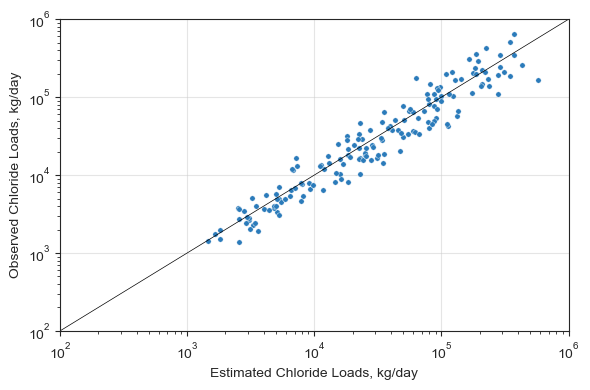

In [72]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000000],[-100,100000000], 'k', lw=0.5)
min_lim, max_lim = 1e2, 1e6
plt.xlim(min_lim,max_lim)
plt.ylim(min_lim,max_lim)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Chloride Loads, kg/day")
plt.ylabel("Observed Chloride Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_FvsF.pdf')


In [73]:
EGRET_Daily = EGRET_Daily.drop([4290])

In [74]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


In [75]:
EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,1996,137.5,14.129197,53461.5,5.007299,137.500000,1996.374658,1757.007299,137.5,1.292245,13.862265,13.507536,4.896817,0.366313,183.629819,96285.871583,162.308218,85283.523553,35144.343128,16043.271448
1,1997,457.0,14.899975,53781.0,6.526027,183.838356,1997.248374,1767.501370,457.0,1.648883,15.308436,15.621652,4.475714,0.379839,120.201608,73280.834485,156.165282,68940.494073,26747.504587,12045.437319
2,1998,822.0,10.054032,54146.0,6.526027,183.838356,1998.248288,1779.501370,822.0,0.975968,10.056670,10.177659,4.795252,0.361878,161.087688,58810.189241,147.152337,65805.390707,21465.719073,9760.363188
3,1999,1187.0,5.032656,54511.0,6.526027,183.838356,1999.248288,1791.501370,1187.0,0.267084,5.021789,5.034765,5.129817,0.338101,209.843586,37758.855254,138.766480,62904.545279,13781.982168,6136.260117
4,2000,1552.5,8.529173,54876.5,6.513661,183.500000,2000.248889,1803.497268,1552.5,1.078666,8.525399,8.478119,4.719625,0.362814,140.039706,53945.479035,130.803098,60496.655842,19690.099848,8805.076245
5,2001,1918.0,5.372249,55242.0,6.526027,183.838356,2001.248374,1815.501370,1918.0,0.667788,5.383764,5.423286,4.769826,0.358450,147.724498,33557.547565,123.656316,57779.809837,12248.504861,5469.473573
6,2002,2283.0,7.965367,55607.0,6.526027,183.838356,2002.248288,1827.501370,2283.0,0.856045,7.907352,7.866830,4.698636,0.360423,138.591135,47189.022079,116.821256,55548.512803,17223.993059,7945.109692
7,2003,2648.0,10.477823,55972.0,6.526027,183.838356,2003.248288,1839.501370,2648.0,1.299442,10.225804,10.001818,4.475814,0.371392,111.681634,54313.186402,110.476240,53537.462438,19824.313037,9104.418003
8,2004,3013.5,17.478620,56337.5,6.513661,183.500000,2004.248889,1851.497268,3013.5,1.800974,17.790033,17.861874,4.192802,0.382787,79.723223,74237.946300,104.470799,51983.469940,27096.850399,12500.938993
9,2005,3379.0,15.834540,56703.0,6.526027,183.838356,2005.248374,1863.501370,3379.0,1.487912,15.674063,15.672606,4.234429,0.377544,85.768834,56353.401519,99.142564,50216.699152,20568.991555,9478.575518


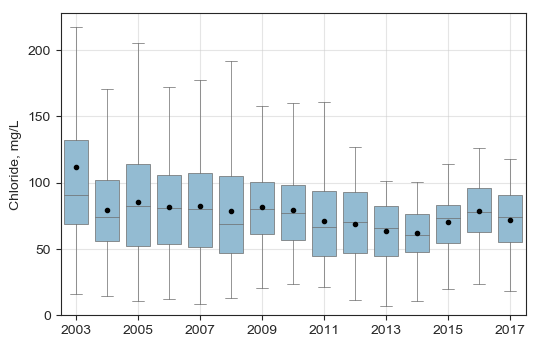

In [76]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2019))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(-0.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Chloride, mg/L")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl.pdf')




In [77]:
EGRET_Daily.groupby('waterYear').mean()

,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
waterYear,,,,,,,,,,,,,,,,,,,
1996,137.5,14.129197,53461.5,5.007299,137.500000,1996.374658,1757.007299,137.5,1.292245,13.862265,13.507536,4.896817,0.366313,183.629819,96285.871583,162.308218,85283.523553,35144.343128,16043.271448
1997,457.0,14.899975,53781.0,6.526027,183.838356,1997.248374,1767.501370,457.0,1.648883,15.308436,15.621652,4.475714,0.379839,120.201608,73280.834485,156.165282,68940.494073,26747.504587,12045.437319
1998,822.0,10.054032,54146.0,6.526027,183.838356,1998.248288,1779.501370,822.0,0.975968,10.056670,10.177659,4.795252,0.361878,161.087688,58810.189241,147.152337,65805.390707,21465.719073,9760.363188
1999,1187.0,5.032656,54511.0,6.526027,183.838356,1999.248288,1791.501370,1187.0,0.267084,5.021789,5.034765,5.129817,0.338101,209.843586,37758.855254,138.766480,62904.545279,13781.982168,6136.260117
2000,1552.5,8.529173,54876.5,6.513661,183.500000,2000.248889,1803.497268,1552.5,1.078666,8.525399,8.478119,4.719625,0.362814,140.039706,53945.479035,130.803098,60496.655842,19690.099848,8805.076245
2001,1918.0,5.372249,55242.0,6.526027,183.838356,2001.248374,1815.501370,1918.0,0.667788,5.383764,5.423286,4.769826,0.358450,147.724498,33557.547565,123.656316,57779.809837,12248.504861,5469.473573
2002,2283.0,7.965367,55607.0,6.526027,183.838356,2002.248288,1827.501370,2283.0,0.856045,7.907352,7.866830,4.698636,0.360423,138.591135,47189.022079,116.821256,55548.512803,17223.993059,7945.109692
2003,2648.0,10.477823,55972.0,6.526027,183.838356,2003.248288,1839.501370,2648.0,1.299442,10.225804,10.001818,4.475814,0.371392,111.681634,54313.186402,110.476240,53537.462438,19824.313037,9104.418003
2004,3013.5,17.478620,56337.5,6.513661,183.500000,2004.248889,1851.497268,3013.5,1.800974,17.790033,17.861874,4.192802,0.382787,79.723223,74237.946300,104.470799,51983.469940,27096.850399,12500.938993


In [78]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




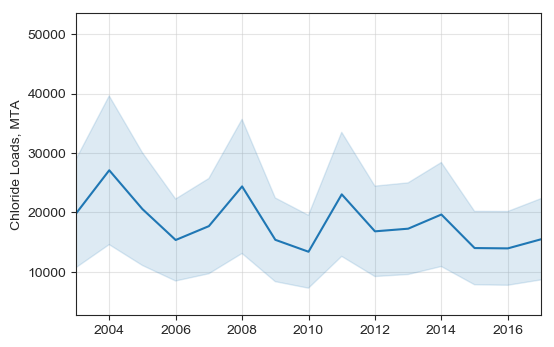

In [79]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Chloride Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables_chloride/img/Rivers/US/'+river+'/'+river+'_Cl_Flux.pdf')


In [80]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
      7  &       8  &       9  &       10 &       11 &       12 &       13 &       14 &       15 &       16 &       17 &       18 &       19 &       20 &       21 \\
\midrule
  2003.0 &   2004.0 &   2005.0 &   2006.0 &   2007.0 &   2008.0 &   2009.0 &   2010.0 &   2011.0 &   2012.0 &   2013.0 &   2014.0 &   2015.0 &   2016.0 &   2017.0 \\
 19824.3 &  27096.9 &  20569.0 &  15372.9 &  17704.1 &  24383.7 &  15404.9 &  13399.5 &  23048.0 &  16830.7 &  17275.0 &  19657.7 &  14019.5 &  13963.4 &  15492.6 \\
  9104.4 &  12500.9 &   9478.6 &   6891.9 &   8009.2 &  11278.8 &   7035.8 &   6128.4 &  10430.1 &   7599.9 &   7705.2 &   8743.6 &   6171.9 &   6202.0 &   6829.4 \\
\bottomrule
\end{tabular}

